# Assignment 2: K-means

## Toy dataset visualization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style
from math import sqrt

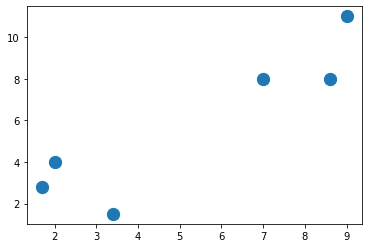

In [2]:
X = np.array([[2, 4],
              [1.7, 2.8],
              [7, 8],
              [8.6, 8],
              [3.4, 1.5],
              [9,11]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

## K-means in 2-d

In [3]:
def initialize_centroids(k, x):

    n_dims = x.shape[1]
    centroid_min = x.min().min()
    centroid_max = x.max().max()
    centroids = []

    for centroid in range(k):
        centroid = np.random.uniform(centroid_min, centroid_max, n_dims)
        centroids.append(centroid)

    centroids = np.array(centroids)

    return centroids

centroids = initialize_centroids(2, X)

In [4]:


def euclidean_distance(a, b):
    # Euclidean distance (l2 norm)
    return sqrt(sum( (a - b)**2))

# Step 1
def closestCentroid(x, centroids):
    assignments = []
    for i in x:
        # distance between one data point and centroids
        distance=[]
        for j in centroids:
            distance.append(euclidean_distance(i, j))
            # assign each data point to the cluster with closest centroid
        assignments.append(np.argmin(distance))
    return np.array(assignments)


# Step 2
def updateCentroid(x, clusters, K):
    new_centroids = []
    for c in range(K):
        # Update the cluster centroid with the average of all points 
        # in this cluster
        cluster_mean = x[clusters == c].mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids


# 2-d kmeans
def kmeans(x, K):
    # initialize the centroids of 2 clusters in the range of [0,20)
    centroids = initialize_centroids(2, X)
    print('Initialized centroids: {}'.format(centroids))
    for i in range(10):
        clusters = closestCentroid(x, centroids)
        centroids = updateCentroid(x, clusters, K)
        print('Iteration: {}, Centroids: {}'.format(i, centroids))
    return centroids,clusters
K = 2

centroids,clusters = kmeans(X, K)


Initialized centroids: [[8.26391108 4.44648067]
 [2.50407492 3.15804999]]
Iteration: 0, Centroids: [array([8.2, 9. ]), array([2.36666667, 2.76666667])]
Iteration: 1, Centroids: [array([8.2, 9. ]), array([2.36666667, 2.76666667])]
Iteration: 2, Centroids: [array([8.2, 9. ]), array([2.36666667, 2.76666667])]
Iteration: 3, Centroids: [array([8.2, 9. ]), array([2.36666667, 2.76666667])]
Iteration: 4, Centroids: [array([8.2, 9. ]), array([2.36666667, 2.76666667])]
Iteration: 5, Centroids: [array([8.2, 9. ]), array([2.36666667, 2.76666667])]
Iteration: 6, Centroids: [array([8.2, 9. ]), array([2.36666667, 2.76666667])]
Iteration: 7, Centroids: [array([8.2, 9. ]), array([2.36666667, 2.76666667])]
Iteration: 8, Centroids: [array([8.2, 9. ]), array([2.36666667, 2.76666667])]
Iteration: 9, Centroids: [array([8.2, 9. ]), array([2.36666667, 2.76666667])]


In [5]:
centroids=np.array(centroids)
clusters=np.array(clusters)

In [6]:
print(clusters)

[1 1 0 0 1 0]


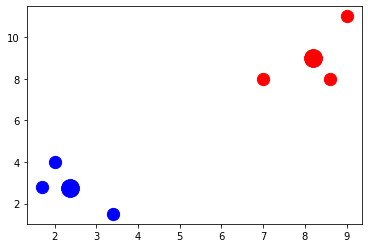

In [7]:
clo=["red","blue"]
for i in range(len(clusters)) : 
    for j in range(K):
        if j==clusters[i]:
            plt.scatter(X[i,0], X[i,1],color=clo[j], s=150)
            plt.scatter(centroids[j,0], centroids[j,1],color=clo[j], s=300)
plt.show() 